### Load packages

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('colorblind')

### Import CSV and preview

In [2]:
pokemon = pd.read_csv('/mnt/pokemon.csv')
pokemon.head(n=10)

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Spec_Attack,Spec_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


### Countplot

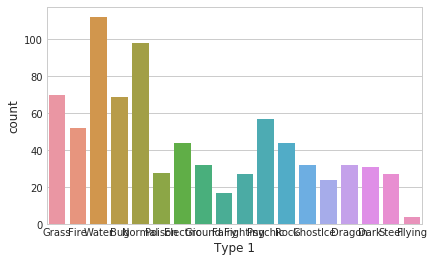

In [7]:
sns.countplot(data=pokemon,x='Type 1')

### Scatterplot

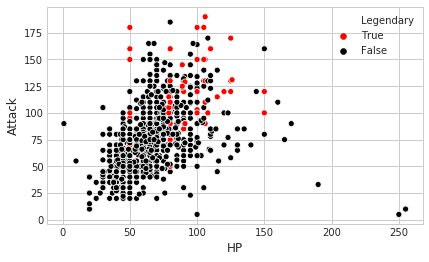

In [17]:
hue_colors = {True: 'red', False: 'black'}
sns.scatterplot(data=pokemon,x='HP',y='Attack',hue='Legendary',hue_order=[True,False],palette=hue_colors)

### Subplots using Relplot (for scatterplots and line plots)

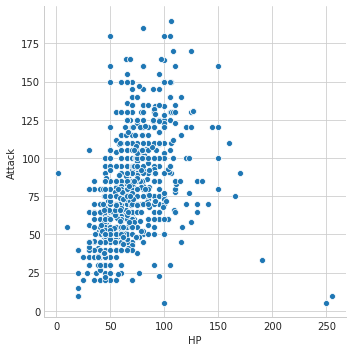

In [3]:
sns.relplot(data=pokemon,x='HP',y='Attack',kind='scatter')

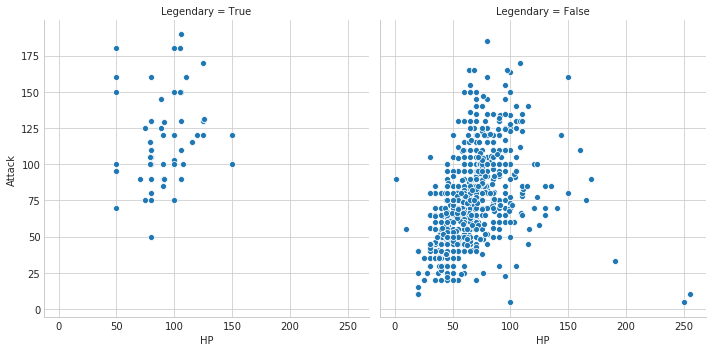

In [7]:
sns.relplot(data=pokemon,x='HP',y='Attack',kind='scatter',col='Legendary',col_order=[True,False])

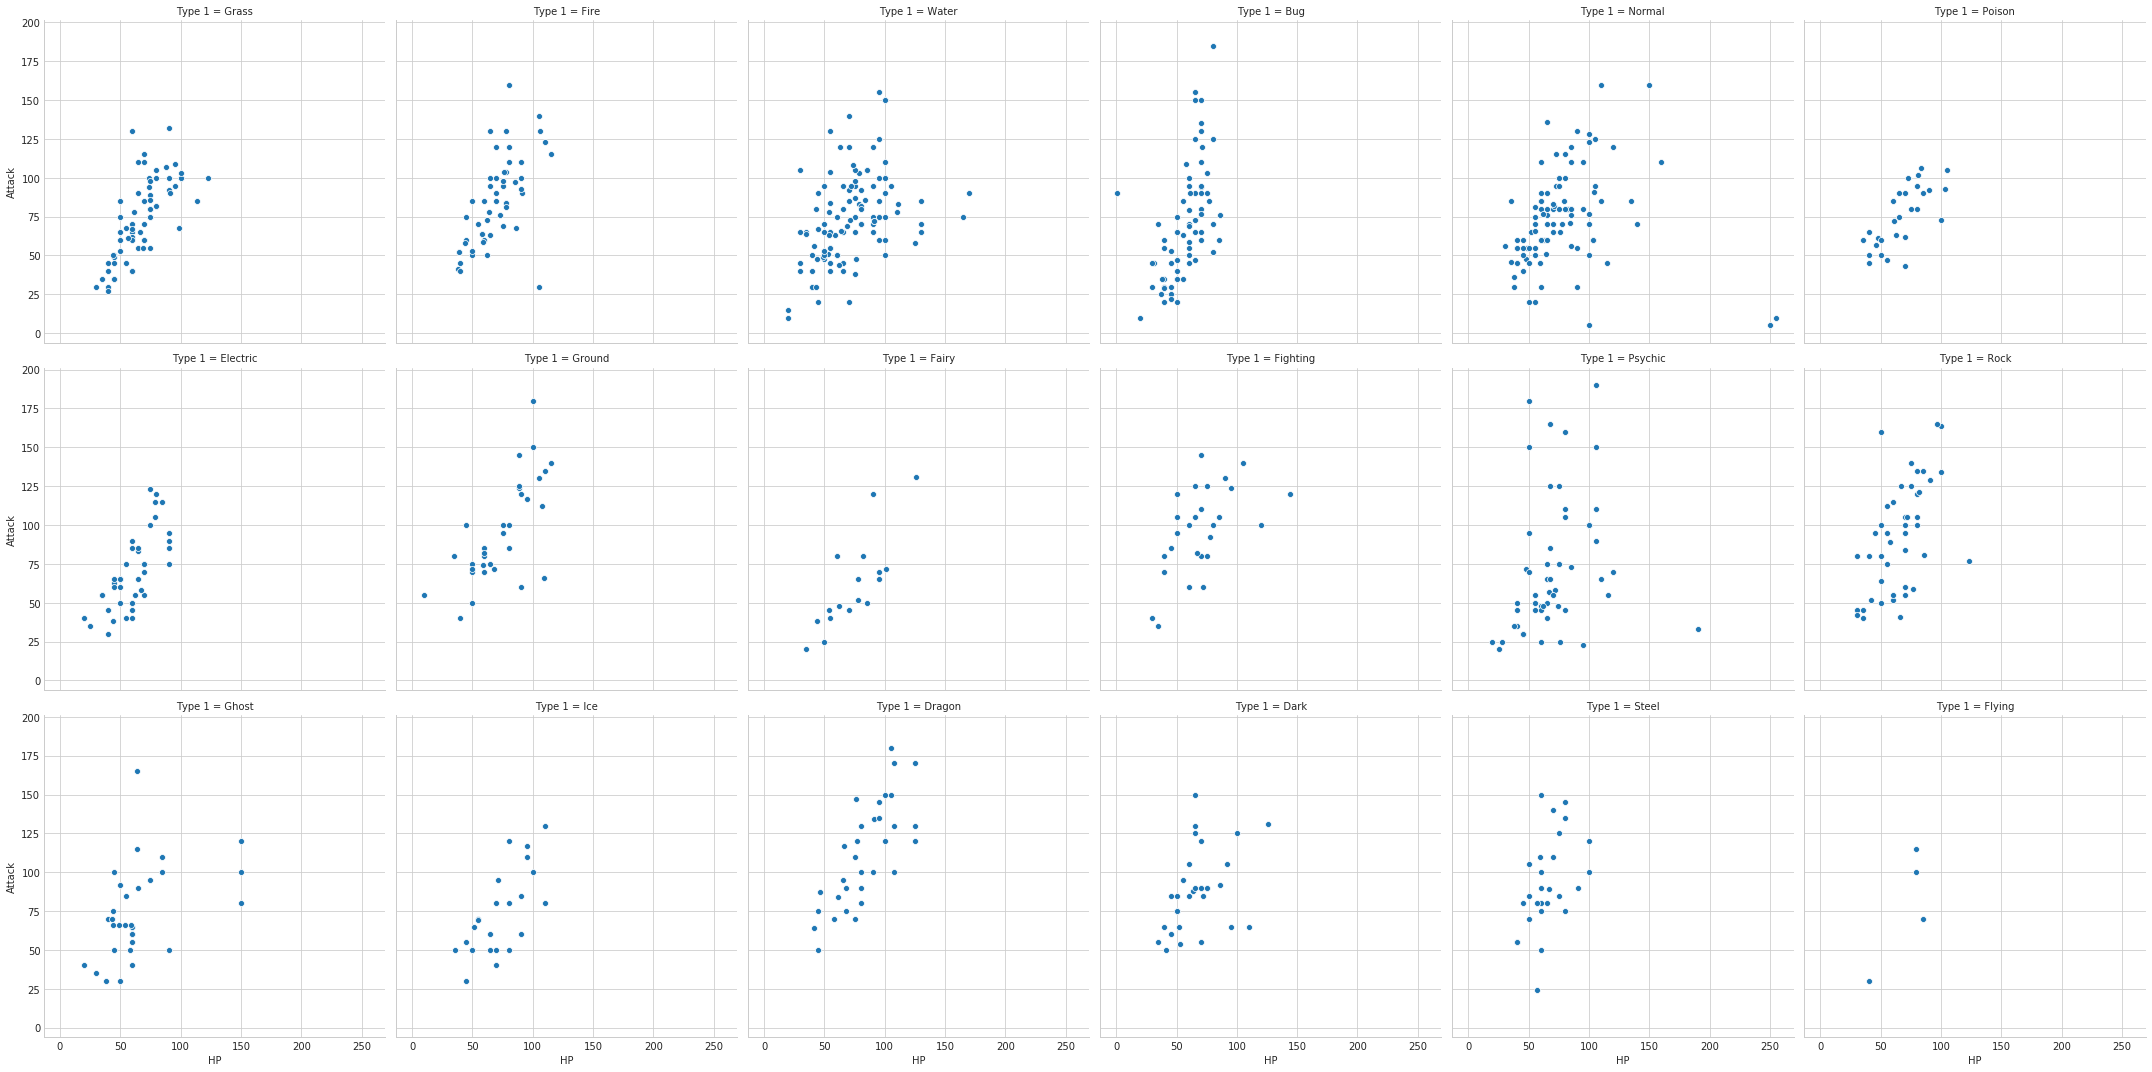

In [8]:
sns.relplot(data=pokemon,x='HP',y='Attack',kind='scatter',col='Type 1',col_wrap=6)

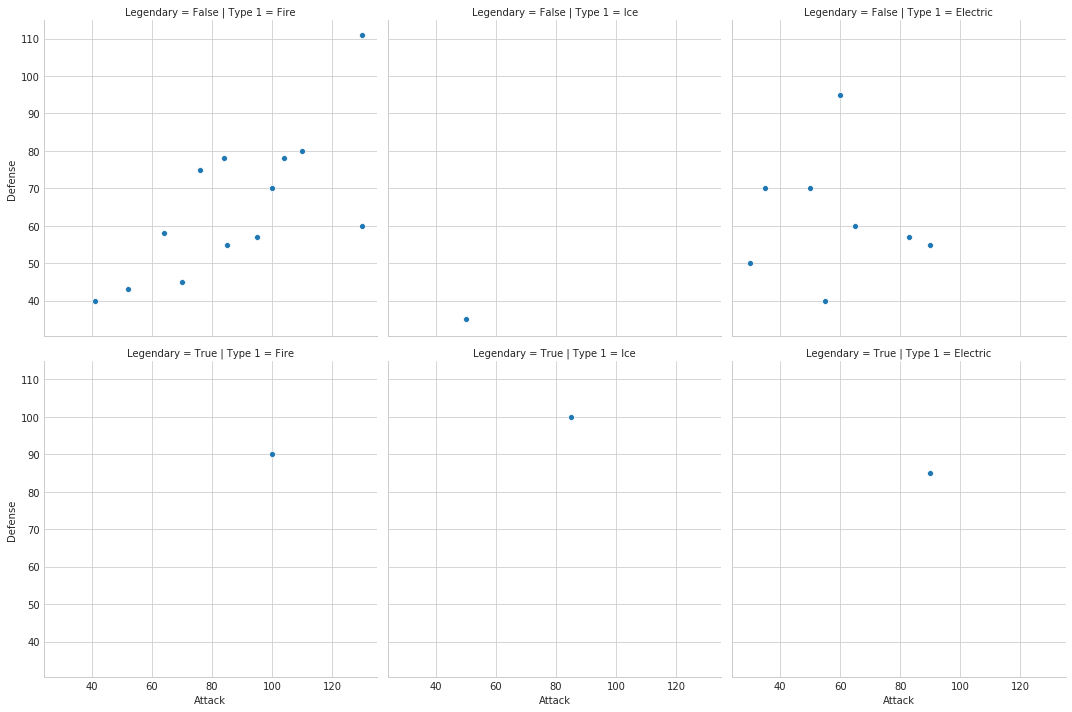

In [11]:
pokemon_sub = pokemon[(pokemon['Generation']==1)&(pokemon['Type 1'].isin(['Fire','Ice','Electric']))]
sns.relplot(data=pokemon_sub,x='Attack',y='Defense',kind='scatter',col='Type 1',col_order=['Fire','Ice','Electric'],
            row='Legendary',row_order=[False,True])

### Customizing scatterplots

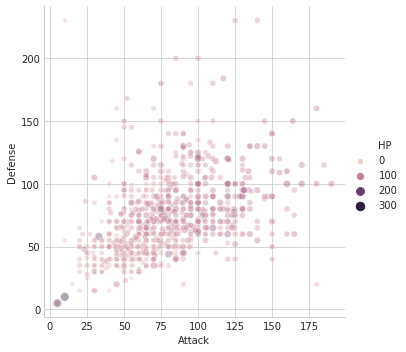

In [18]:
sns.relplot(data=pokemon,x='Attack',y='Defense',kind='scatter',size='HP',hue='HP',alpha=.4)

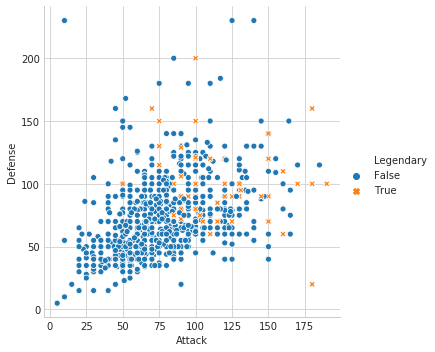

In [22]:
sns.relplot(data=pokemon,x='Attack',y='Defense',kind='scatter',hue='Legendary',style='Legendary')

### Line plots

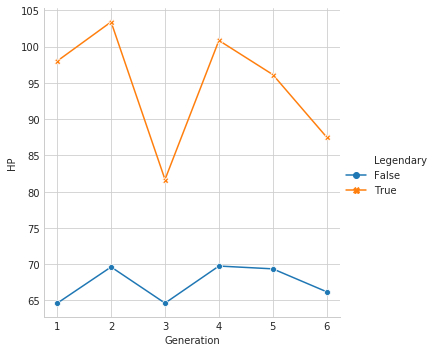

In [33]:
sns.relplot(data=pokemon_sort,kind='line',x='Generation',y='HP',style='Legendary',hue='Legendary',
            ci=None,markers=True,dashes=False)

### Count and barplots using Catplot

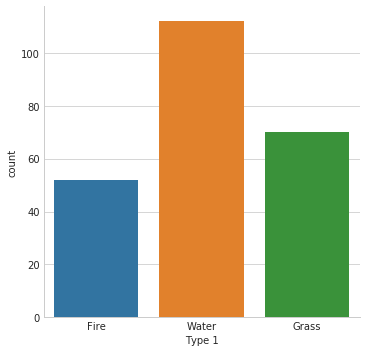

In [37]:
cat_order = ['Fire', 'Water', 'Grass']
pokemon_sub = pokemon[pokemon['Type 1'].isin(cat_order)]
sns.catplot(data=pokemon_sub,x='Type 1',kind='count',order=cat_order)

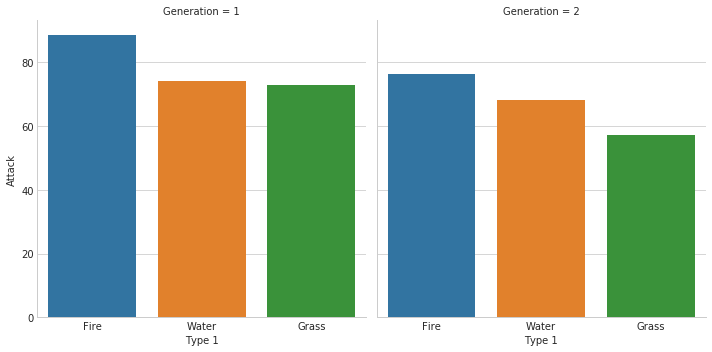

In [43]:
pokemon_gen12 = pokemon[pokemon['Generation'].isin([1,2])]
cat_order = ['Fire', 'Water', 'Grass']
sns.catplot(data=pokemon_gen12,x='Type 1',y='Attack',kind='bar',order=cat_order,ci=None,col='Generation')

### Stripplot and Swarmplot

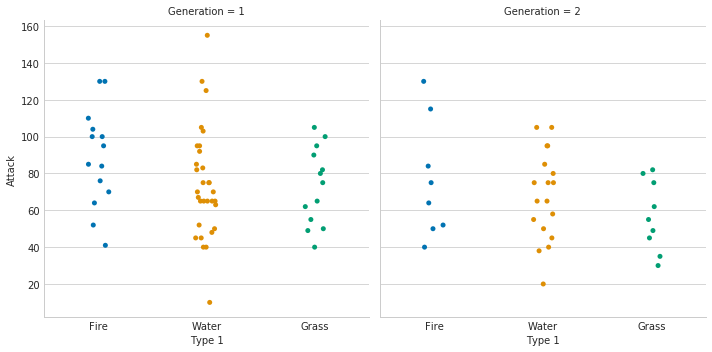

In [33]:
pokemon_gen12 = pokemon[pokemon['Generation'].isin([1,2])]
cat_order = ['Fire', 'Water', 'Grass']
sns.catplot(data=pokemon_gen12,x='Type 1',y='Attack',kind='strip',order=cat_order,col='Generation',jitter=True)

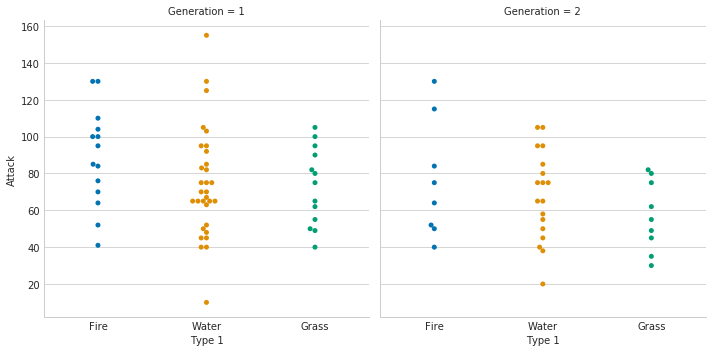

In [32]:
pokemon_gen12 = pokemon[pokemon['Generation'].isin([1,2])]
cat_order = ['Fire', 'Water', 'Grass']
sns.catplot(data=pokemon_gen12,x='Type 1',y='Attack',kind='swarm',order=cat_order,col='Generation')

### Boxplots and violin plots

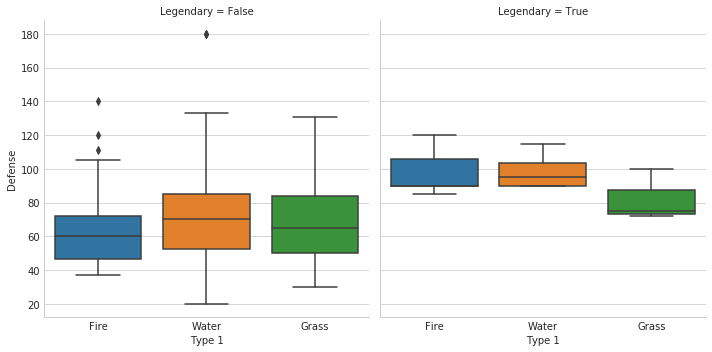

In [47]:
cat_order = ['Fire', 'Water', 'Grass']
sns.catplot(data=pokemon,x='Type 1',y='Defense',kind='box',order=cat_order,col='Legendary')

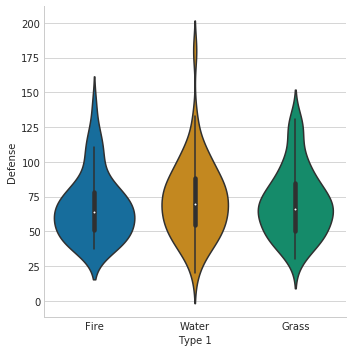

In [35]:
cat_order = ['Fire', 'Water', 'Grass']
sns.catplot(data=pokemon,x='Type 1',y='Defense',kind='violin',order=cat_order)

### Point plots

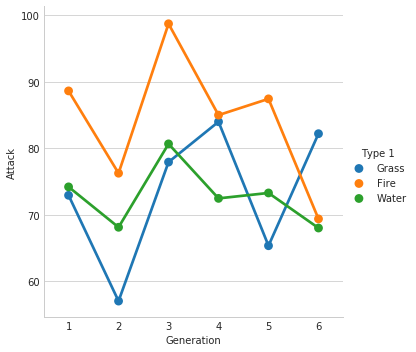

In [64]:
cat_order = ['Fire', 'Water', 'Grass']
pokemon_sub = pokemon[pokemon['Type 1'].isin(cat_order)]
sns.catplot(data=pokemon_sub,kind='point',x='Generation',y='Attack',hue='Type 1',join=True,ci=False)
# estimator = np.median to use median
# capsize to add caps to the CIs

### Styling options for plots

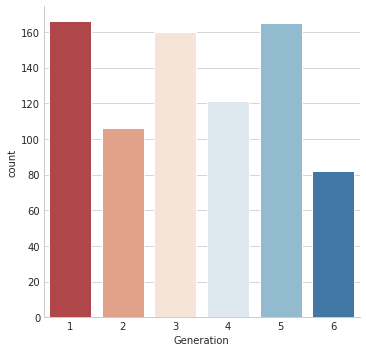

In [66]:
# sns.set_style('whitegrid')
# sns.set_palette('RdBu')

sns.catplot(data=pokemon,x='Generation',kind='count')

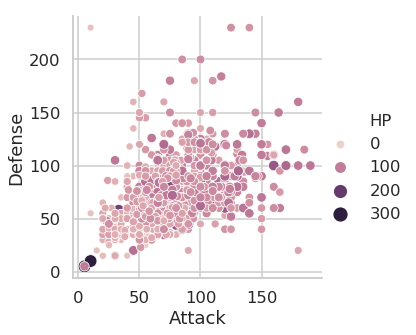

In [71]:
sns.set_palette('Blues')
sns.set_context('talk')
sns.relplot(data=pokemon,x='Attack',y='Defense',hue='HP',size='HP')

### Changing titles and labels

In [72]:
# relplot and catplot create FacetGrid objects
# Scatterplot, countplot, etc. create AxesSubplot objects

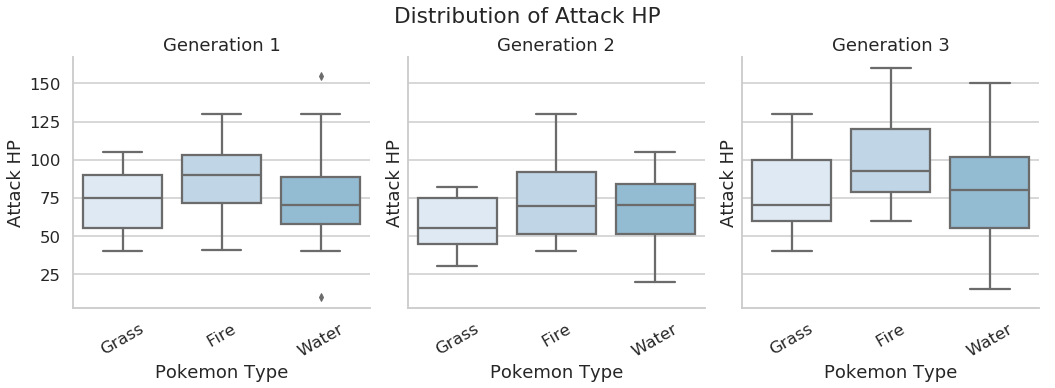

In [88]:
pokemon_sub = pokemon[(pokemon['Generation'].isin([1,2,3]))&(pokemon['Type 1'].isin(['Fire','Water','Grass']))]
g = sns.catplot(data=pokemon_sub,x='Type 1',y='Attack',kind='box',col='Generation')
g.fig.suptitle("Distribution of Attack HP",y=1.03) # y=1 is the default height
g.set_titles('Generation {col_name}')
g.set(xlabel='Pokemon Type',ylabel='Attack HP')
g.set_xticklabels(rotation=30)

### Distplot

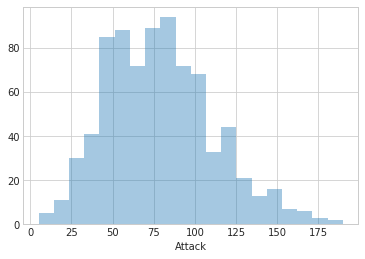

In [4]:
sns.distplot(pokemon['Attack'],hist=True,kde=False)

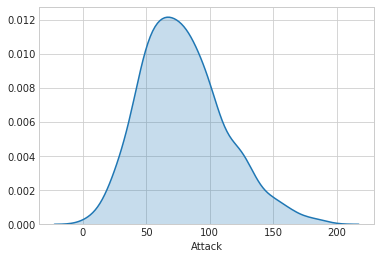

In [5]:
sns.distplot(pokemon['Attack'],hist=False,kde=True,kde_kws={'shade':True})

### Lmplot

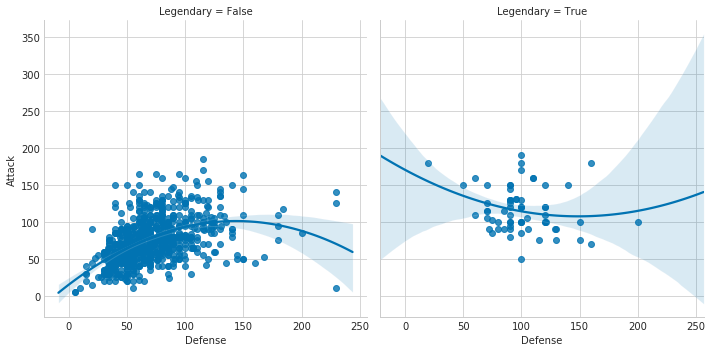

In [37]:
sns.lmplot(data=pokemon,x='Defense',y='Attack',col='Legendary',order=2)

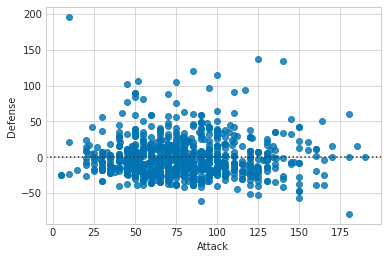

In [38]:
sns.residplot(data=pokemon,x='Attack',y='Defense',order=2)

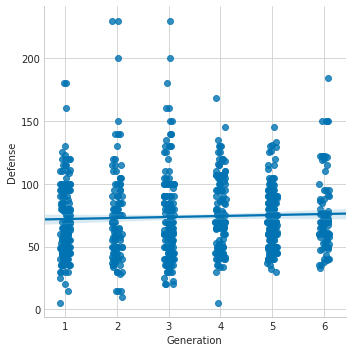

In [46]:
sns.lmplot(data=pokemon,x='Generation',y='Defense',x_jitter=.1)

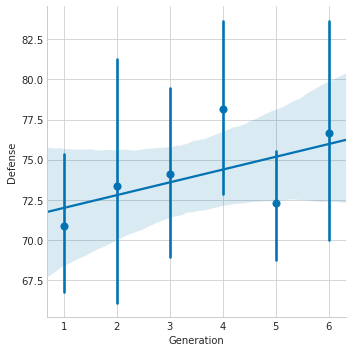

In [47]:
sns.lmplot(data=pokemon,x='Generation',y='Defense',x_estimator=np.mean,)

### Adjusting colors

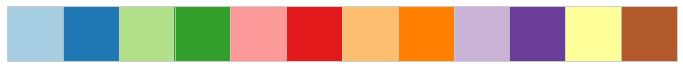

In [15]:
sns.palplot(sns.color_palette('Paired',12))

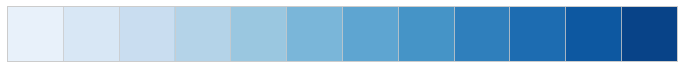

In [16]:
sns.palplot(sns.color_palette('Blues',12))

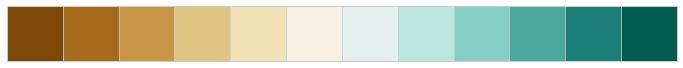

In [17]:
sns.palplot(sns.color_palette('BrBG',12))

### Using axes object to customize plot

[Text(0, 0.5, 'Density'),
 (0, 220),
 Text(0.5, 0, 'Attack Strength'),
 Text(0.5, 1.0, 'Distribution of Attack Strength')]

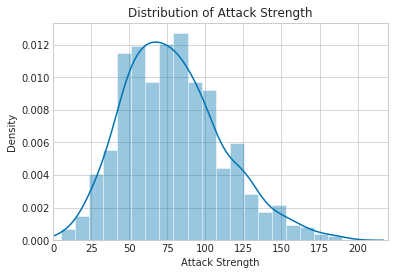

In [21]:
fig, ax = plt.subplots()
sns.distplot(pokemon['Attack'],ax=ax)
ax.set(xlabel='Attack Strength',ylabel='Density',xlim=(0,220),
       title='Distribution of Attack Strength')

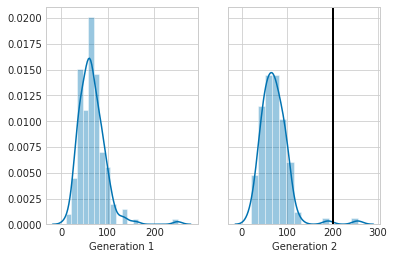

In [26]:
fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2,sharey=True)

sns.distplot(pokemon.query('Generation==1')['HP'], ax=ax0)
sns.distplot(pokemon.query('Generation==2')['HP'], ax=ax1)

ax0.set(xlabel='Generation 1')
ax1.set(xlabel='Generation 2')
ax1.axvline(x=200,color='black',linestyle='-',label='Over 200',linewidth=2)

### Matrix plots

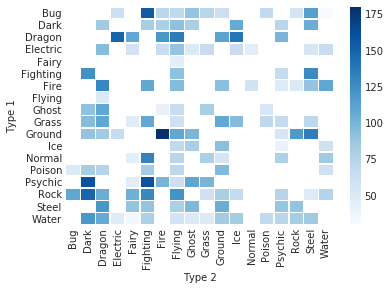

In [63]:
type_pivot = pokemon.pivot_table(index='Type 1',columns='Type 2',values='Attack',aggfunc=np.mean)
sns.heatmap(data=type_pivot,annot=False,cmap='Blues',cbar=True,linewidth=.5)

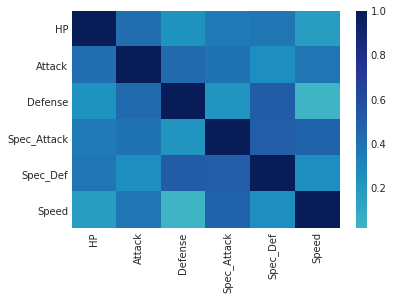

In [78]:
cont_cols = ['HP','Attack','Defense','Spec_Attack','Spec_Def','Speed']
sns.heatmap(pokemon[cont_cols].corr(),center=0,cmap='YlGnBu')

### Paired plot

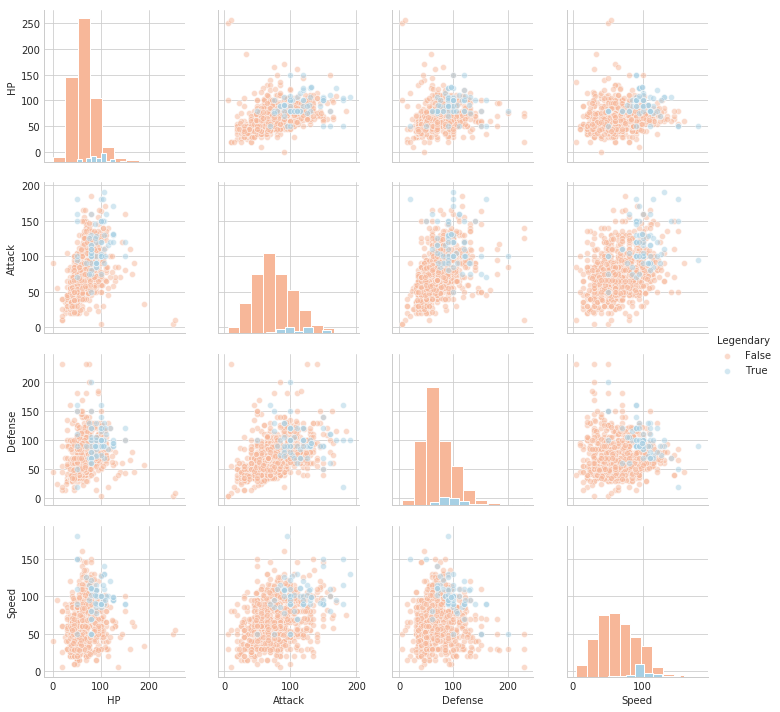

In [86]:
cont_cols = ['HP','Attack','Defense','Speed']
sns.pairplot(data=pokemon,vars=cont_cols,kind='scatter',diag_kind='hist',
             hue='Legendary',plot_kws={'alpha':.5},palette='RdBu')

### Joint plot

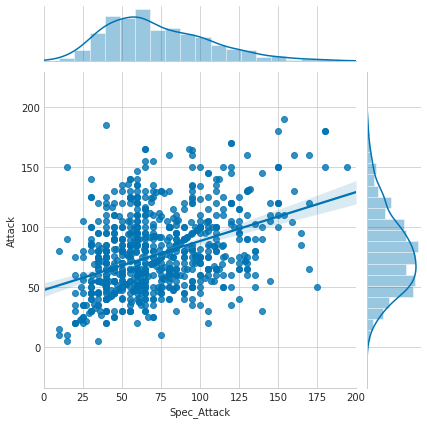

In [94]:
sns.jointplot(data=pokemon,x='Spec_Attack',y='Attack',kind='reg',robust=True,xlim=(0,200))